<a href="https://colab.research.google.com/github/MonseMontesBocanegra/4105_IntroML/blob/Assignments/Homwork3_MonseMontesBocanegra_801297280.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.7857142857142857
Precision: 0.6944444444444444
Recall: 0.5319148936170213
F1: 0.6024096385542169


Text(0.5, 427.9555555555555, 'Predicted label')

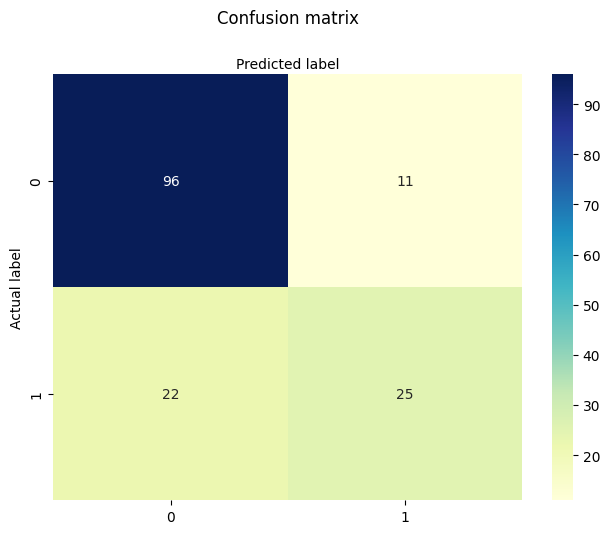

In [6]:
# Split data from 80% to 20% in the dataset
#cancer is from sklearn

# P1:
# - No need to plot your loss because you cant observe it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns


url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv"
df = pd.read_csv(url)
print(df.head())

X = df.iloc[:, 1].values
y = df.iloc[:, -1].values

X[0:10]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train.reshape(-1, 1))
X_test = sc_X.transform(X_test.reshape(-1,1))

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1:", metrics.f1_score(Y_test, Y_pred))

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



Accuracy (No Regularization): 0.9737
Precision (No Regularization): 0.9722
Recall (No Regularization): 0.9859
F1 Score (No Regularization): 0.9790
------------------------------------------------
Accuracy (L1 Regularization): 0.9737
Precision (L1 Regularization): 0.9857
Recall (L1 Regularization): 0.9718
F1 Score (L1 Regularization): 0.9787


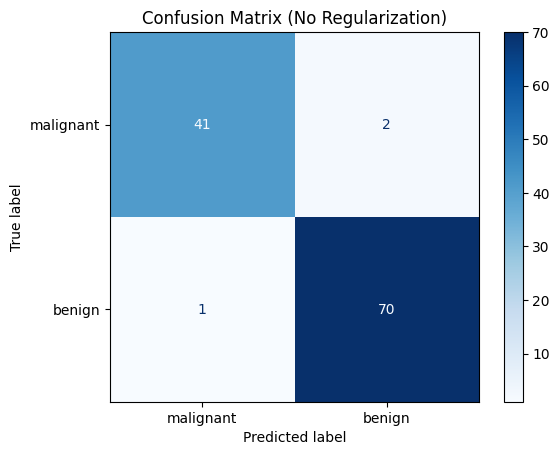

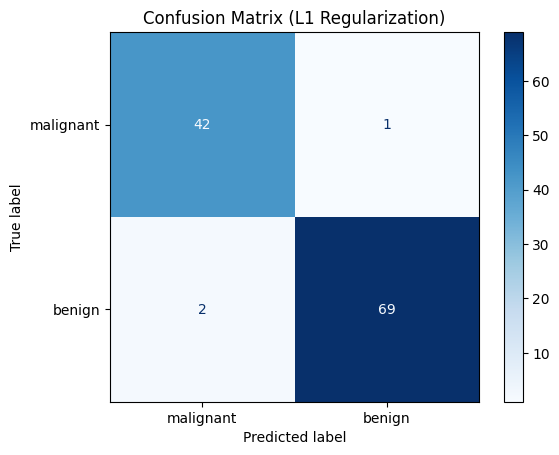

In [ ]:

#P2: No need to record loss, record results, 2a plain logistic  regression, 2B add the wieght penalties "passing it as a parameter L1"
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (No Regularization): {accuracy:.4f}")
print(f"Precision (No Regularization): {precision:.4f}")
print(f"Recall (No Regularization): {recall:.4f}")
print(f"F1 Score (No Regularization): {f1:.4f}")

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
log_reg_l1.fit(X_train, y_train)


y_pred_l1 = log_reg_l1.predict(X_test)


accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1)
recall_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print(f"------------------------------------------------")
print(f"Accuracy (L1 Regularization): {accuracy_l1:.4f}")
print(f"Precision (L1 Regularization): {precision_l1:.4f}")
print(f"Recall (L1 Regularization): {recall_l1:.4f}")
print(f"F1 Score (L1 Regularization): {f1_l1:.4f}")


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (No Regularization)")
plt.show()


cm_l1 = confusion_matrix(y_test, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(confusion_matrix=cm_l1, display_labels=breast.target_names)
disp_l1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (L1 Regularization)")
plt.show()



Naive Bayes Classifier Results:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


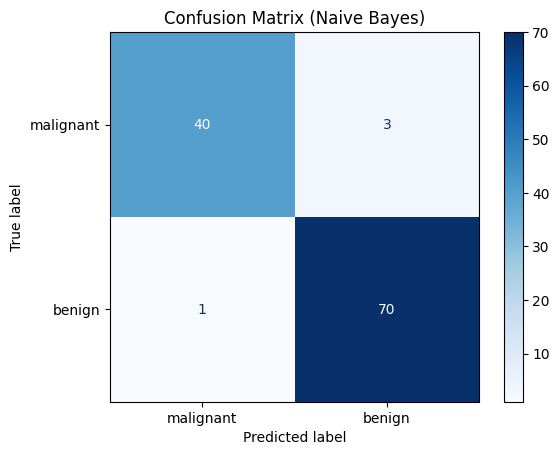

In [ ]:
#P3- Do the Baysiean model, (first randomize and split test and then normalize, or you can normalize first then split), Final score is F1 = 2*recall/(percision+recall)... "One metric to say how good it is"
#P3 - for cancer do the bayesen model (stop here)

# P3 - Use Bayesian model for breast cancer classification and evaluate performance using F1 score
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict using the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate performance metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print results
print(f"Naive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=breast.target_names)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()


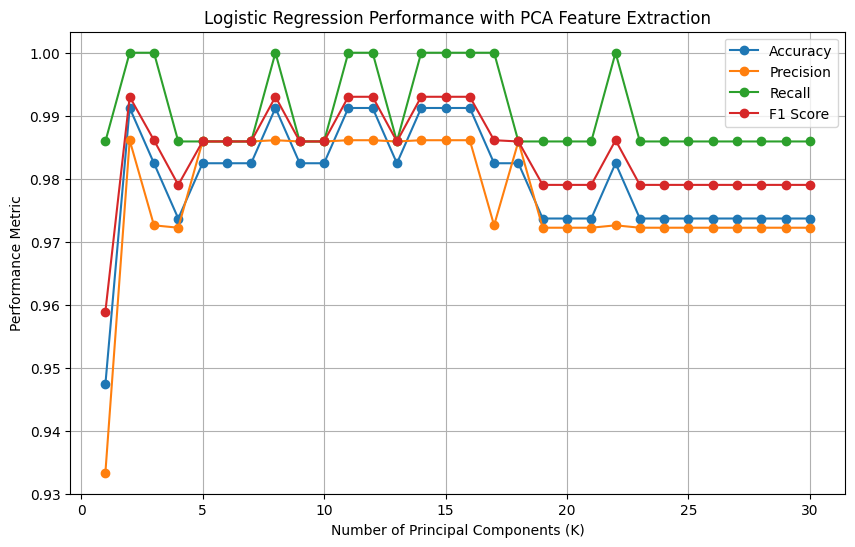

The optimal number of principal components (K) is: 2
Highest Accuracy achieved: 0.9912


In [ ]:
# P4 : talks about reduction, Do the Baysiean model
# Gaussian Naive Bayes
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = range(1, X_train.shape[1] + 1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    # Perform PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train_pca, y_train)

    y_pred = log_reg.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

optimal_k = np.argmax(accuracy_scores) + 1  # Adding 1 because index starts at 0

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Performance Metric')
plt.title('Logistic Regression Performance with PCA Feature Extraction')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of principal components (K) is: {optimal_k}")
print(f"Highest Accuracy achieved: {accuracy_scores[optimal_k-1]:.4f}")


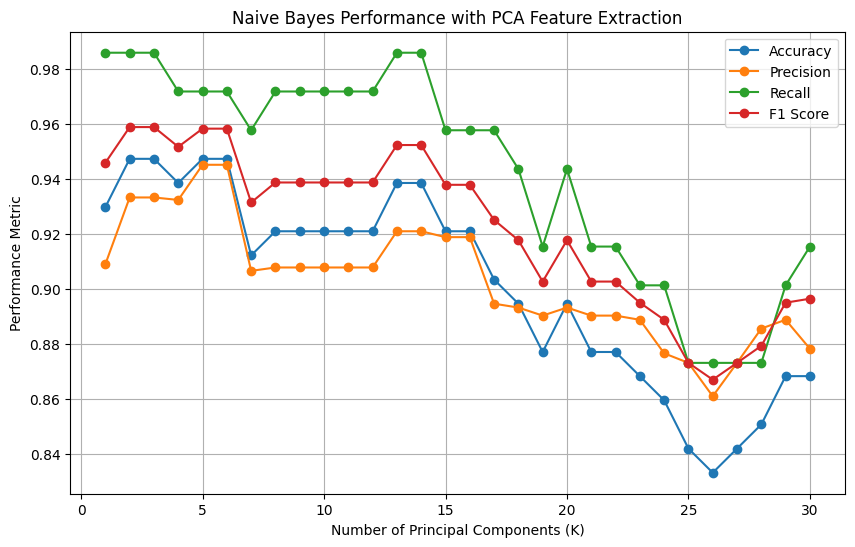

The optimal number of principal components (K) is: 2
Highest Accuracy achieved: 0.9474


In [ ]:
#P5: bayes classifier instead of logistic regression because that is used in P4
#P5: naive bayes law is literally one line of code, replace the logistic regression with bayes classifier
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer


breast = load_breast_cancer()
X = breast.data
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = range(1, X_train.shape[1] + 1)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Naive Bayes model
    bayes_classifier = GaussianNB()
    bayes_classifier.fit(X_train_pca, y_train)

    y_pred = bayes_classifier.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

optimal_k = np.argmax(accuracy_scores) + 1  # Adding 1 because index starts at 0

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Performance Metric')
plt.title('Naive Bayes Performance with PCA Feature Extraction')
plt.legend()
plt.grid(True)
plt.show()


print(f"The optimal number of principal components (K) is: {optimal_k}")
print(f"Highest Accuracy achieved: {accuracy_scores[optimal_k-1]:.4f}")
